In [59]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
df = pd.read_csv("online_sales_dataset.csv")

In [61]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


In [62]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Discount', 'PaymentMethod',
       'ShippingCost', 'Category', 'SalesChannel', 'ReturnStatus',
       'ShipmentProvider', 'WarehouseLocation', 'OrderPriority'],
      dtype='object')

In [63]:
df.dtypes

InvoiceNo              int64
StockCode             object
Description           object
Quantity               int64
InvoiceDate           object
UnitPrice            float64
CustomerID           float64
Country               object
Discount             float64
PaymentMethod         object
ShippingCost         float64
Category              object
SalesChannel          object
ReturnStatus          object
ShipmentProvider      object
WarehouseLocation     object
OrderPriority         object
dtype: object

In [64]:
df_cleaned = df.drop(columns = ["InvoiceNo","StockCode","Description","InvoiceDate","CustomerID","Country"
                   ,"PaymentMethod","ShippingCost","SalesChannel","ShipmentProvider","WarehouseLocation","OrderPriority","ReturnStatus"])

In [65]:
df_cleaned.head()

,Quantity,UnitPrice,Discount,Category
0,38,1.71,0.470000,Apparel
1,18,41.25,0.190000,Electronics
2,49,29.11,0.350000,Electronics
3,14,76.68,0.140000,Accessories
4,-30,-68.11,1.501433,Electronics


In [66]:
df_cleaned.isnull().sum()

Quantity     0
UnitPrice    0
Discount     0
Category     0
dtype: int64

In [67]:
df.duplicated().sum()

np.int64(0)

In [68]:
df[df["Quantity"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium
144,451279,SKU_1617,Wall Clock,-2,2020-01-07 00:00,34.06,NaN,Spain,0.340000,Credit Card,NaN,Furniture,Online,Not Returned,DHL,NaN,Medium
147,747972,SKU_1514,Desk Lamp,-26,2020-01-07 03:00,-72.33,NaN,Netherlands,1.972087,paypall,NaN,Electronics,In-store,Not Returned,Royal Mail,NaN,Low
167,318969,SKU_1115,Desk Lamp,-19,2020-01-07 23:00,-3.61,NaN,Italy,1.052254,Credit Card,NaN,Apparel,In-store,Not Returned,UPS,NaN,High
176,285340,SKU_1710,Blue Pen,-3,2020-01-08 08:00,85.95,NaN,Netherlands,0.260000,Credit Card,NaN,Accessories,In-store,Not Returned,UPS,NaN,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49730,487771,SKU_1083,Wall Clock,-7,2025-09-03 02:00,-57.31,NaN,United Kingdom,1.139869,paypall,NaN,Accessories,Online,Not Returned,DHL,NaN,Low
49739,106493,SKU_1736,Desk Lamp,-40,2025-09-03 11:00,-51.34,NaN,Netherlands,0.230000,Bank Transfer,NaN,Accessories,In-store,Not Returned,FedEx,NaN,Medium
49749,540459,SKU_1405,White Mug,-36,2025-09-03 21:00,12.21,NaN,Portugal,0.290000,paypall,NaN,Stationery,Online,Not Returned,UPS,NaN,High
49760,726763,SKU_1273,White Mug,-34,2025-09-04 08:00,10.34,NaN,France,0.350000,Credit Card,NaN,Furniture,Online,Not Returned,DHL,NaN,High


In [69]:
invalid_rows = df_cleaned[
    (df["UnitPrice"] <= 0) | (df["Quantity"] <= 0)
]
print("Invalid rows:", len(invalid_rows))

Invalid rows: 2489


In [70]:
df_valid = df_cleaned[
    (df["UnitPrice"] > 0) &
    (df["Quantity"] > 0)
].copy()

In [71]:
df_valid.head()

,Quantity,UnitPrice,Discount,Category
0,38,1.71,0.47,Apparel
1,18,41.25,0.19,Electronics
2,49,29.11,0.35,Electronics
3,14,76.68,0.14,Accessories
5,47,70.16,0.48,Electronics


In [72]:
df_valid.shape

(47293, 4)

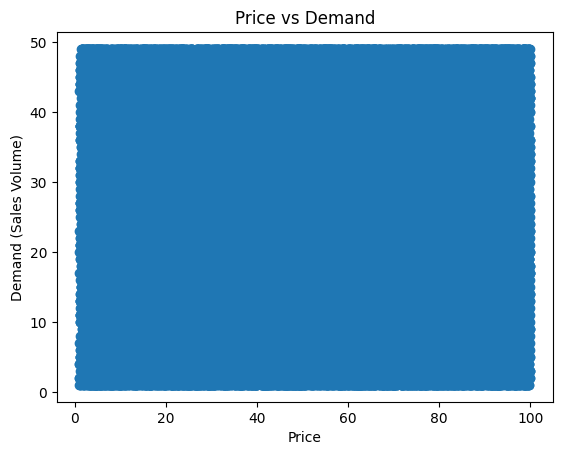

In [73]:
plt.figure()
plt.scatter(df_valid["UnitPrice"], df_valid["Quantity"])
plt.xlabel("Price")
plt.ylabel("Demand (Sales Volume)")
plt.title("Price vs Demand")
plt.show()

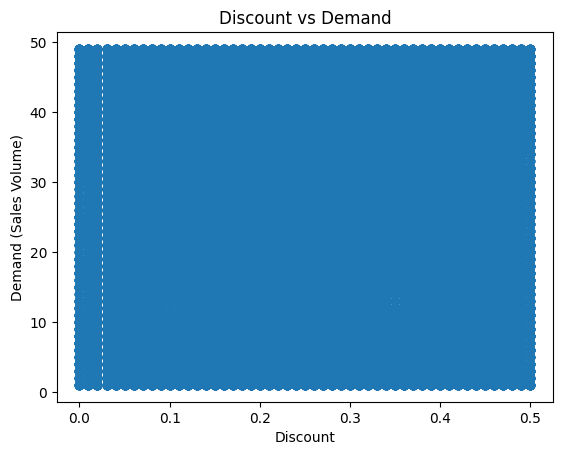

In [74]:
plt.figure()
plt.scatter(df_valid["Discount"], df_valid["Quantity"])
plt.xlabel("Discount")
plt.ylabel("Demand (Sales Volume)")
plt.title("Discount vs Demand")
plt.show()


In [91]:
df_valid["CompetitorPrice"] = (
    df.groupby("Category")["UnitPrice"]
    .transform("median")
)

In [92]:
df_valid.head()

,Quantity,UnitPrice,Discount,Category,CompetitorPrice
0,38,1.71,0.47,Apparel,49.00
1,18,41.25,0.19,Electronics,49.35
2,49,29.11,0.35,Electronics,49.35
3,14,76.68,0.14,Accessories,49.03
5,47,70.16,0.48,Electronics,49.35


In [93]:
df_valid["elasticity_index"] = (
    df_valid["CompetitorPrice"] / df_valid["UnitPrice"]
) * (1 - df_valid["Discount"])

In [94]:
df_valid["elasticity_index"].describe()


count    47293.000000
mean         1.690619
std          3.252904
min          0.243235
25%          0.486858
50%          0.721135
75%          1.417805
max         47.059406
Name: elasticity_index, dtype: float64

In [95]:
df_valid["elasticity_index"] = df_valid["elasticity_index"].clip(0.1, 3)


In [96]:
df_valid["elasticity_index"].describe()

count    47293.000000
mean         1.110290
std          0.869373
min          0.243235
25%          0.486858
50%          0.721135
75%          1.417805
max          3.000000
Name: elasticity_index, dtype: float64

In [97]:
df_valid.head()

,Quantity,UnitPrice,Discount,Category,CompetitorPrice,elasticity_index
0,38,1.71,0.47,Apparel,49.00,3.000000
1,18,41.25,0.19,Electronics,49.35,0.969055
2,49,29.11,0.35,Electronics,49.35,1.101941
3,14,76.68,0.14,Accessories,49.03,0.549893
5,47,70.16,0.48,Electronics,49.35,0.365764


In [98]:
df_valid.to_csv("cleaned_online_sales.csv",index=False)